In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/Users/lammari_a/Documents/DATASETS/ML project 3/new_sleep_dataset.xlsx")


In [3]:
df

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,Elephantidae,herbi,vu,6654.000,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
1,African giant pouched rat,Cricetomys,Rodentia,Nesomyidae,omni,lc,1.000,6.6,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,Muridae,omni,lc,0.044,0.0,8.7,15.3,NaN,NaN,2.0,23.0,NaN,NaN,NaN
3,Arctic fox,Vulpes,Carnivora,Canidae,carni,lc,3.380,44.5,12.5,11.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0
4,Arctic ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.920,5.7,16.6,7.4,NaN,NaN,11.0,25.0,5.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Vervet,Cercopithecus,Primates,Cercopithecidae,omni,lc,4.750,58.0,10.0,14.0,9.7,0.6,24.0,210.0,4.0,3.0,4.0
83,Vesper mouse,Calomys,Rodentia,Cricetidae,herbi,lc,0.045,0.0,7.0,17.0,NaN,NaN,2.0,23.0,NaN,NaN,NaN
84,Vole,Microtus,Rodentia,Cricetidae,herbi,lc,0.035,0.0,12.8,11.2,NaN,NaN,2.0,21.0,NaN,NaN,NaN
85,Water opossum,Chironectes,Didelphimorphia,Didelphidae,carni,lc,3.500,3.9,19.4,4.6,12.8,6.6,3.0,14.0,2.0,1.0,1.0


## EDA 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Species       87 non-null     object 
 1   Genus         87 non-null     object 
 2   Order         87 non-null     object 
 3   Family        87 non-null     object 
 4   Vore          87 non-null     object 
 5   Conservation  87 non-null     object 
 6   BodyWt        87 non-null     float64
 7   BrainWt       87 non-null     float64
 8   TotalSleep    87 non-null     float64
 9   Awake         87 non-null     float64
 10  NonDreaming   47 non-null     float64
 11  Dreaming      63 non-null     float64
 12  LifeSpan      87 non-null     float64
 13  Gestation     87 non-null     float64
 14  Predation     58 non-null     float64
 15  Exposure      58 non-null     float64
 16  Danger        58 non-null     float64
dtypes: float64(11), object(6)
memory usage: 11.7+ KB


In [5]:
df.describe()

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
count,87.000000,87.000000,87.000000,87.000000,47.000000,63.000000,87.000000,87.000000,58.000000,58.000000,58.000000
mean,161.384310,196.405287,10.608046,13.393103,8.736170,1.979365,17.275862,129.362069,2.844828,2.362069,2.586207
std,768.846727,793.628150,4.465793,4.467481,3.679522,1.474204,17.787590,137.010772,1.496214,1.575005,1.426989
min,0.005000,0.000000,1.900000,4.100000,2.100000,0.100000,2.000000,11.000000,1.000000,1.000000,1.000000
25%,0.202500,0.000000,8.150000,10.250000,6.300000,0.900000,3.700000,30.000000,2.000000,1.000000,1.000000
50%,2.000000,5.500000,10.300000,13.700000,8.400000,1.800000,12.000000,68.000000,3.000000,2.000000,2.000000
75%,43.165000,64.000000,13.750000,15.850000,11.000000,2.500000,24.500000,180.000000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,19.900000,22.100000,17.900000,6.600000,100.000000,645.000000,5.000000,5.000000,5.000000


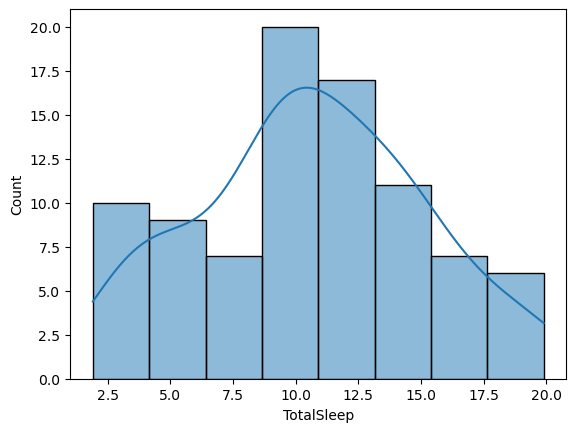

In [6]:
sns.histplot(df['TotalSleep'], kde=True)
plt.show()


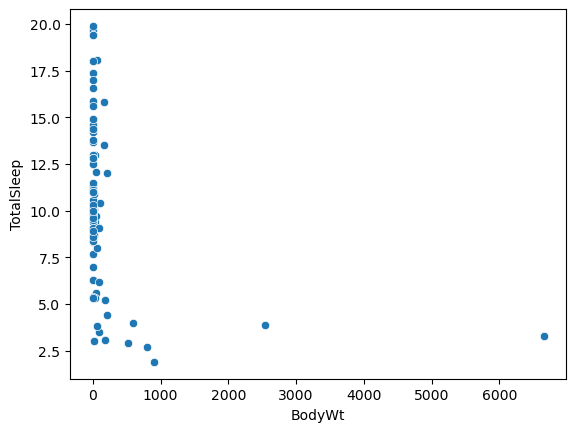

In [7]:
sns.scatterplot(x='BodyWt', y='TotalSleep', data=df)
plt.show()


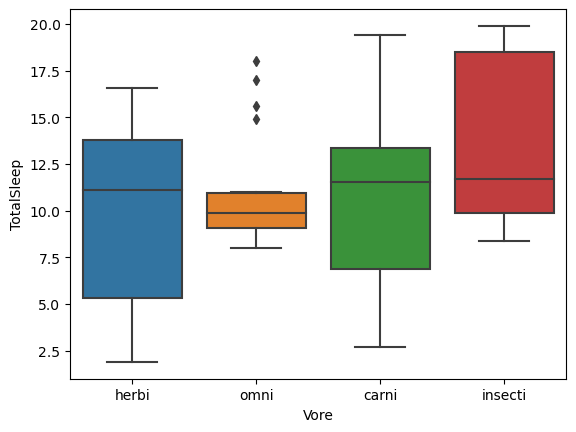

In [8]:
sns.boxplot(x='Vore', y='TotalSleep', data=df)
plt.show()

In [9]:
df.corr()

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
BodyWt,1.000000,0.925683,-0.310147,0.310119,-0.390767,-0.166742,0.313327,0.617190,0.070922,0.370613,0.150341
BrainWt,0.925683,1.000000,-0.319661,0.319476,-0.376848,-0.093491,0.452311,0.649895,0.027343,0.383869,0.143061
TotalSleep,-0.310147,-0.319661,1.000000,-0.999999,0.915648,0.749131,-0.479972,-0.662344,-0.408713,-0.677876,-0.587729
Awake,0.310119,0.319476,-0.999999,1.000000,-0.915648,-0.749136,0.480057,0.662598,0.408713,0.677876,0.587729
NonDreaming,-0.390767,-0.376848,0.915648,-0.915648,1.000000,0.517966,-0.384519,-0.552568,-0.332149,-0.550287,-0.495562
Dreaming,-0.166742,-0.093491,0.749131,-0.749136,0.517966,1.000000,-0.340853,-0.486155,-0.500967,-0.571760,-0.628060
LifeSpan,0.313327,0.452311,-0.479972,0.480057,-0.384519,-0.340853,1.000000,0.707386,-0.109571,0.396446,0.061943
Gestation,0.617190,0.649895,-0.662344,0.662598,-0.552568,-0.486155,0.707386,1.000000,0.181728,0.664229,0.365185
Predation,0.070922,0.027343,-0.408713,0.408713,-0.332149,-0.500967,-0.109571,0.181728,1.000000,0.619839,0.930782
Exposure,0.370613,0.383869,-0.677876,0.677876,-0.550287,-0.571760,0.396446,0.664229,0.619839,1.000000,0.770361


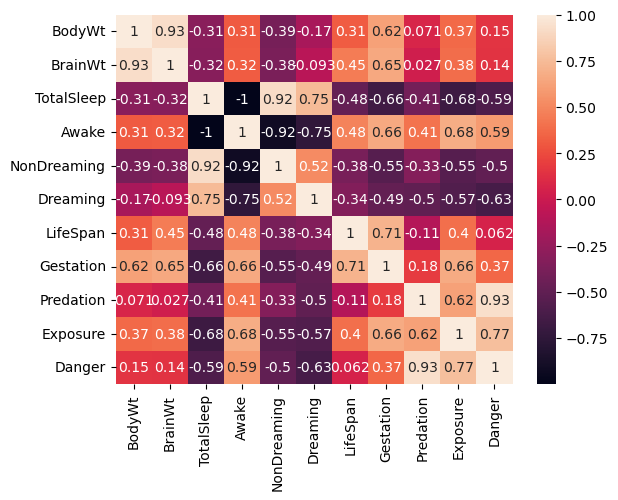

In [10]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

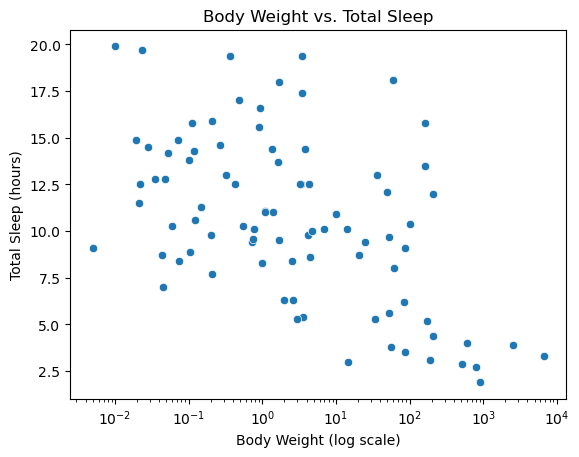

In [11]:
sns.scatterplot(x='BodyWt', y='TotalSleep', data=df)
plt.xscale('log')  # Using log scale if BodyWt varies widely
plt.xlabel('Body Weight (log scale)')
plt.ylabel('Total Sleep (hours)')
plt.title('Body Weight vs. Total Sleep')
plt.show()

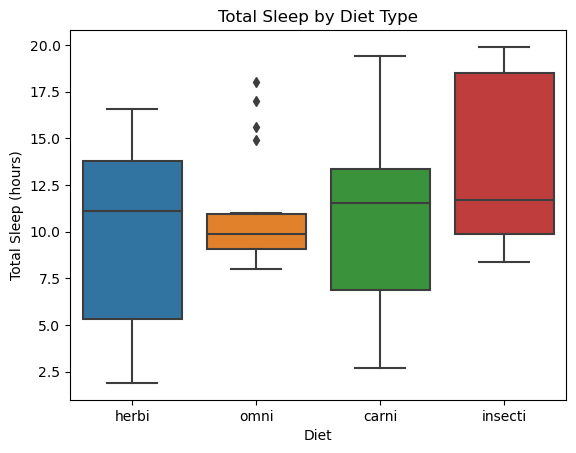

In [12]:
sns.boxplot(x='Vore', y='TotalSleep', data=df)
plt.xlabel('Diet')
plt.ylabel('Total Sleep (hours)')
plt.title('Total Sleep by Diet Type')
plt.show()

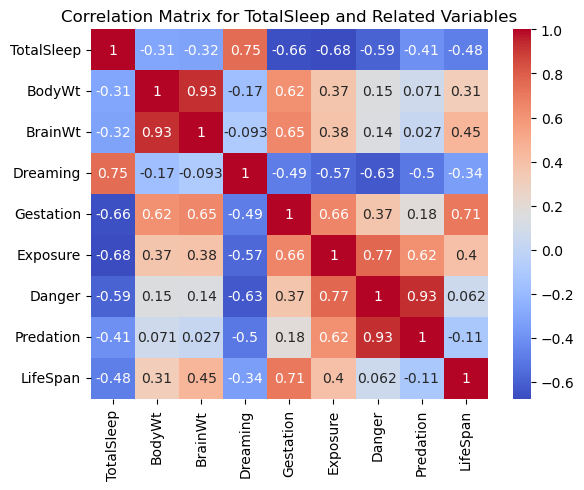

In [13]:
# Selecting relevant columns for correlation analysis
columns_of_interest = ['TotalSleep', 'BodyWt', 'BrainWt', 'Dreaming', 'Gestation', 'Exposure', 'Danger', 'Predation', 'LifeSpan']
correlation_matrix = df[columns_of_interest].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for TotalSleep and Related Variables')
plt.show()

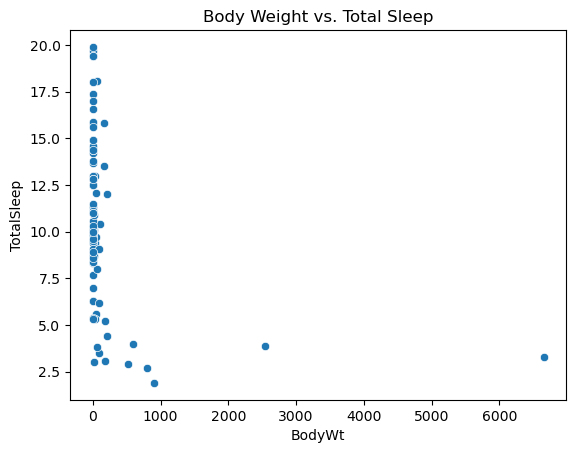

In [15]:
sns.scatterplot(x='BodyWt', y='TotalSleep', data=df)
plt.title('Body Weight vs. Total Sleep')
plt.show()

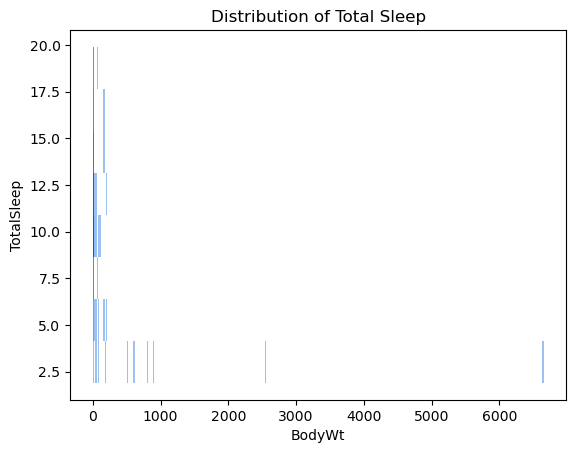

In [17]:
sns.histplot(x='BodyWt', y='TotalSleep', data=df, kde=True)
plt.title('Distribution of Total Sleep')
plt.show()

In [18]:
df.Conservation.value_counts()

lc              50
domesticated    10
vu               9
en               8
nt               7
cd               2
cr               1
Name: Conservation, dtype: int64

In [19]:
df.Conservation.isna().value_counts()

False    87
Name: Conservation, dtype: int64

In [20]:
df.Order.value_counts()

Rodentia           22
Carnivora          14
Primates           13
Artiodactyla        6
Soricomorpha        5
Hyracoidea          3
Cetacea             3
Perissodactyla      3
Didelphimorphia     3
Diprotodontia       2
Proboscidea         2
Cingulata           2
Erinaceomorpha      2
Chiroptera          2
Lagomorpha          1
Monotremata         1
Afrosoricida        1
Pilosa              1
Scandentia          1
Name: Order, dtype: int64

In [21]:
df.Genus.value_counts()

Spermophilus    3
Panthera        3
Equus           2
Vulpes          2
Canis           2
               ..
Priodontes      1
Genetta         1
Galago          1
Erinaceus       1
Eutamias        1
Name: Genus, Length: 80, dtype: int64

In [22]:
df.Family.value_counts()

Cricetidae          7
Sciuridae           5
Felidae             5
Muridae             4
Canidae             4
Cercopithecidae     4
Bovidae             3
Didelphidae         3
Soricidae           3
Procaviidae         3
Hominidae           3
Lorisidae           2
Talpidae            2
Equidae             2
Erinaceidae         2
Elephantidae        2
Phocidae            2
Delphinidae         2
Vespertilionidae    2
Tachyglossidae      1
Cebidae             1
Tenrecidae          1
Cervidae            1
Procyonidae         1
Leporidae           1
Bradypodidae        1
Potoroidae          1
Suidae              1
Phalangeridae       1
Aotidae             1
Otariidae           1
Giraffidae          1
Aplodontia          1
Lemuridae           1
Spalacidae          1
Dasypodidae         1
Caviidae            1
Nesomyidae          1
Chlamyphoridae      1
Viverridae          1
Galagidae           1
Octodontidae        1
Phocoena            1
Chinchillidae       1
Tapiridae           1
Tupaiidae 

In [23]:
df.Vore.value_counts()

herbi      37
carni      22
omni       20
insecti     8
Name: Vore, dtype: int64

(Text(0.5, 0, 'Gestation Period (days)'),
 Text(0, 0.5, 'Total Sleep (hours)'),
 Text(0.5, 1.0, 'Total Sleep vs. Gestation Period'))

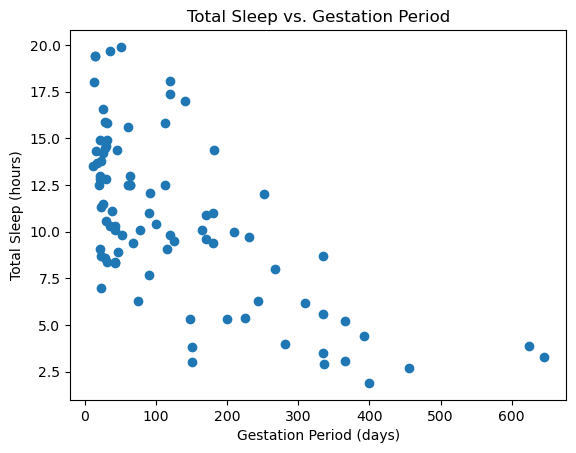

In [25]:
plt.scatter(df['Gestation'], df['TotalSleep'])
plt.xlabel('Gestation Period (days)'), plt.ylabel('Total Sleep (hours)'), plt.title('Total Sleep vs. Gestation Period')


(<matplotlib.collections.PathCollection at 0x7f7fb9455fa0>,
 Text(0.5, 0, 'BodyWt'),
 Text(0, 0.5, 'Total Sleep'))

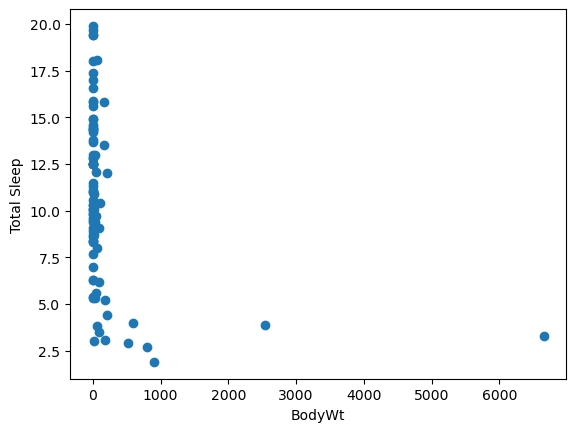

In [29]:
plt.scatter(df['BodyWt'], df['TotalSleep']), plt.xlabel('BodyWt'), plt.ylabel('Total Sleep')



(<matplotlib.collections.PathCollection at 0x7f7fdbc86c10>,
 Text(0.5, 0, 'LifeSpan'),
 Text(0, 0.5, 'Total Sleep'))

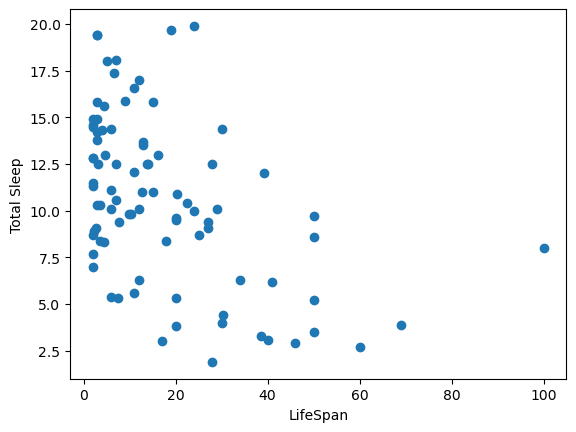

In [30]:
plt.scatter(df['LifeSpan'], df['TotalSleep']), plt.xlabel('LifeSpan'), plt.ylabel('Total Sleep')


(<matplotlib.collections.PathCollection at 0x7f7fb9544fd0>,
 Text(0.5, 0, 'Exposure'),
 Text(0, 0.5, 'Total Sleep'))

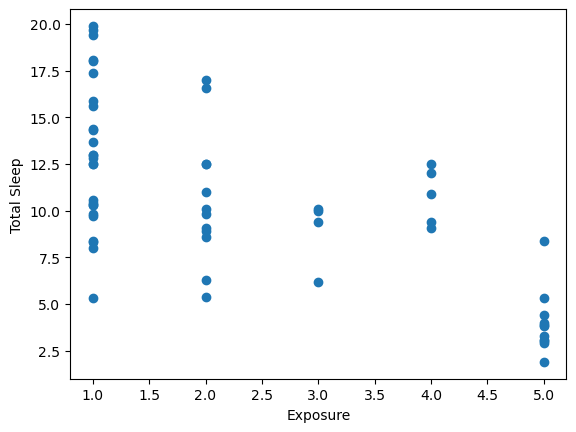

In [31]:
plt.scatter(df['Exposure'], df['TotalSleep']), plt.xlabel('Exposure'), plt.ylabel('Total Sleep')


(<matplotlib.collections.PathCollection at 0x7f7fb97824f0>,
 Text(0.5, 0, 'Predation'),
 Text(0, 0.5, 'Total Sleep'))

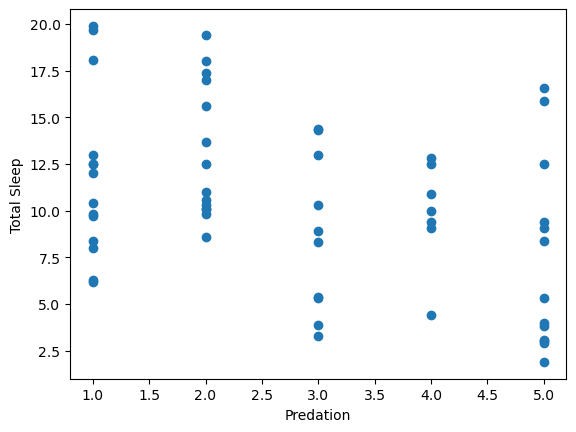

In [32]:
plt.scatter(df['Predation'], df['TotalSleep']), plt.xlabel('Predation'), plt.ylabel('Total Sleep')


(<matplotlib.collections.PathCollection at 0x7f7fc876a160>,
 Text(0.5, 0, 'Danger'),
 Text(0, 0.5, 'Total Sleep'))

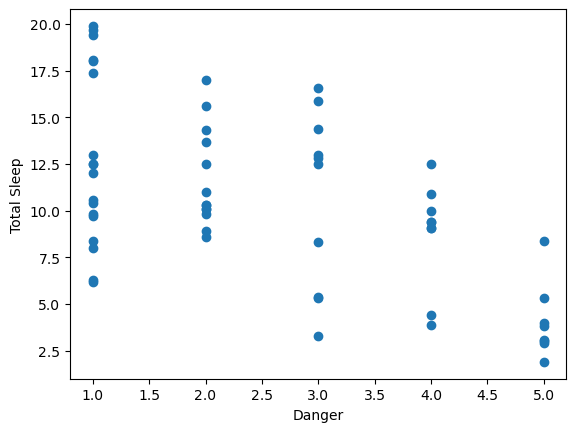

In [33]:
plt.scatter(df['Danger'], df['TotalSleep']), plt.xlabel('Danger'), plt.ylabel('Total Sleep')


(<matplotlib.collections.PathCollection at 0x7f7fb94ecfd0>,
 Text(0.5, 0, 'Danger'),
 Text(0, 0.5, 'Dreaming'))

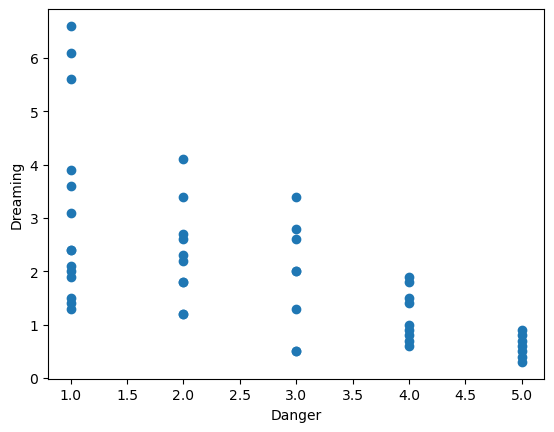

In [34]:
plt.scatter(df['Danger'], df['Dreaming']), plt.xlabel('Danger'), plt.ylabel('Dreaming')


(<matplotlib.collections.PathCollection at 0x7f7fb97d97c0>,
 Text(0.5, 0, 'TotalSleep'),
 Text(0, 0.5, 'Dreaming'))

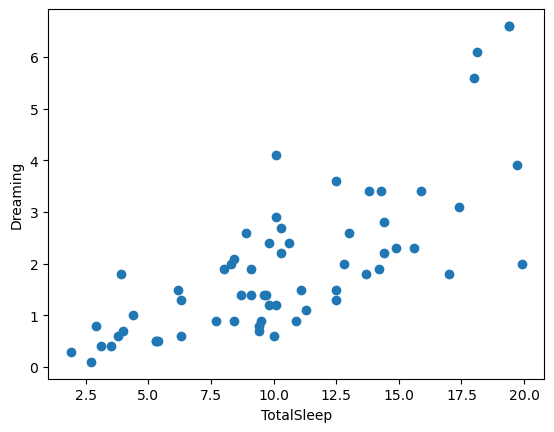

In [35]:
plt.scatter(df['TotalSleep'], df['Dreaming']), plt.xlabel('TotalSleep'), plt.ylabel('Dreaming')


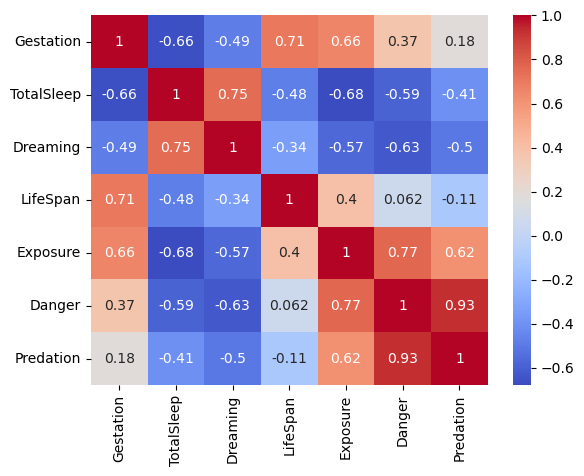

In [37]:
sns.heatmap(df[['Gestation', 'TotalSleep', 'Dreaming' , 'LifeSpan','Exposure','Danger','Predation']].corr(), annot=True, cmap='coolwarm')
plt.show()


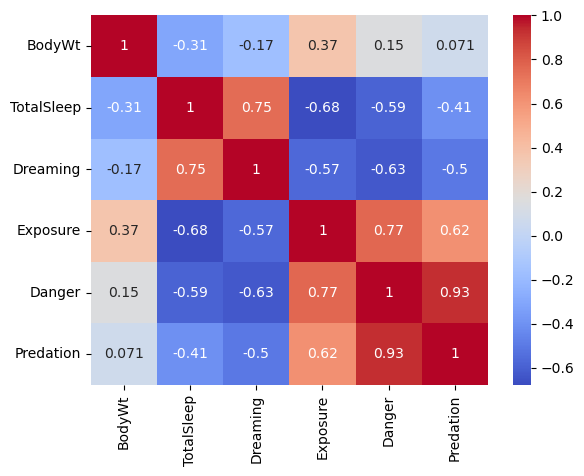

In [38]:
sns.heatmap(df[['BodyWt', 'TotalSleep', 'Dreaming','Exposure','Danger','Predation']].corr(), annot=True, cmap='coolwarm')
plt.show()


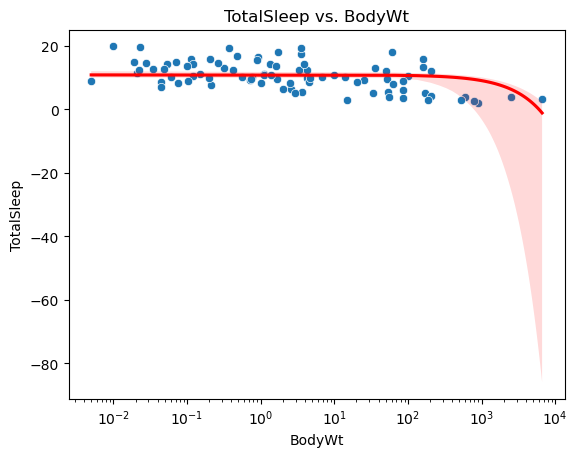

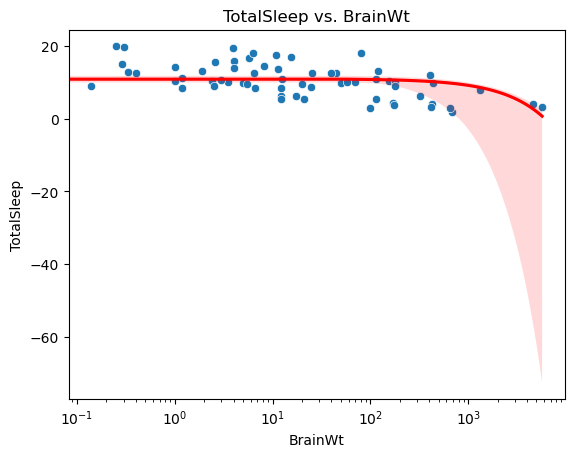

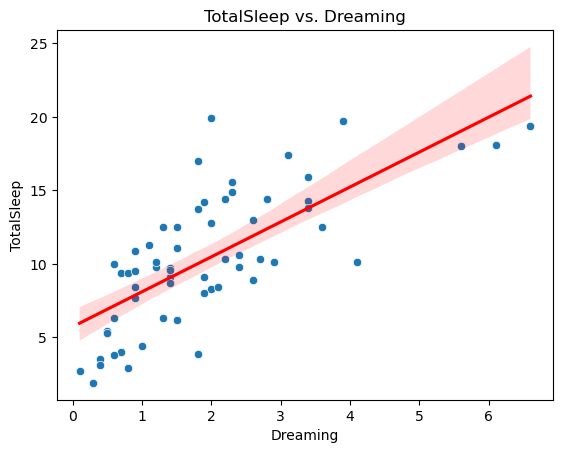

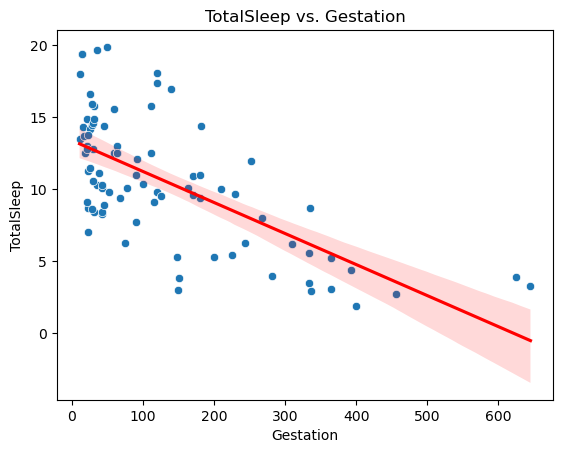

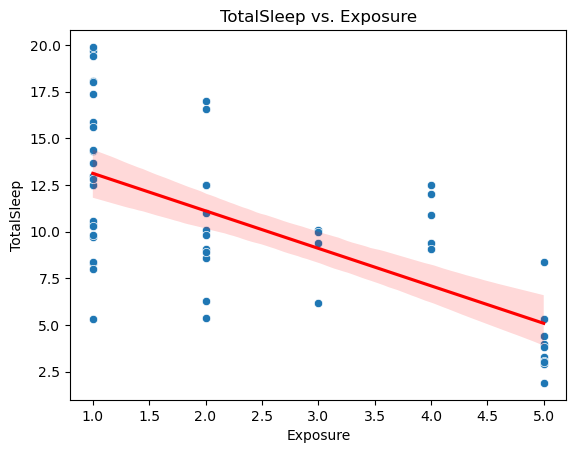

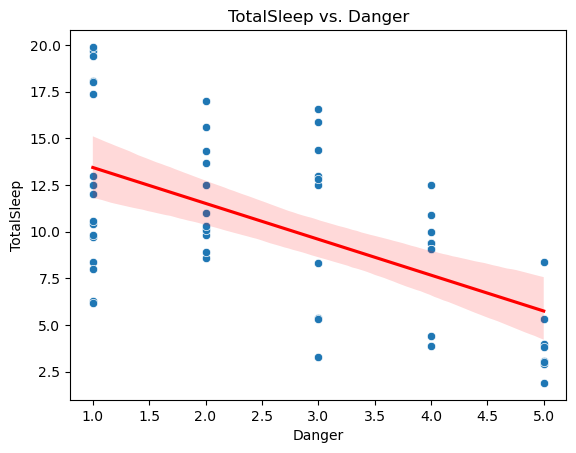

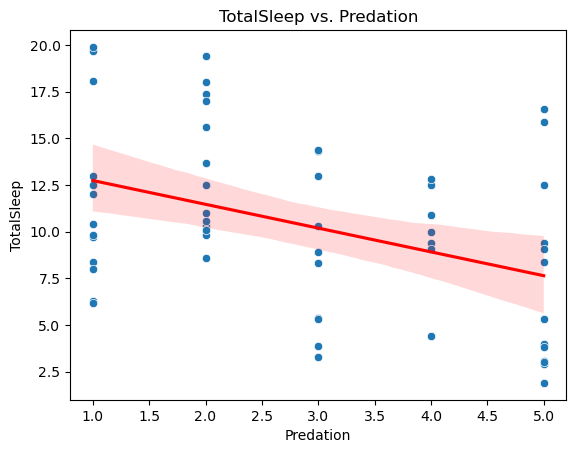

ValueError: Could not interpret value `Lifespan` for parameter `x`

In [39]:
variables = ['BodyWt', 'BrainWt', 'Dreaming', 'Gestation', 'Exposure', 'Danger', 'Predation', 'Lifespan']
for var in variables:
    sns.scatterplot(x=var, y='TotalSleep', data=df)
    sns.regplot(x=var, y='TotalSleep', data=df, scatter=False, color='red')
    plt.xscale('log') if var in ['BodyWt', 'BrainWt'] else plt.xscale('linear')  # Log scale for weight variables
    plt.title(f'TotalSleep vs. {var}')
    plt.show()

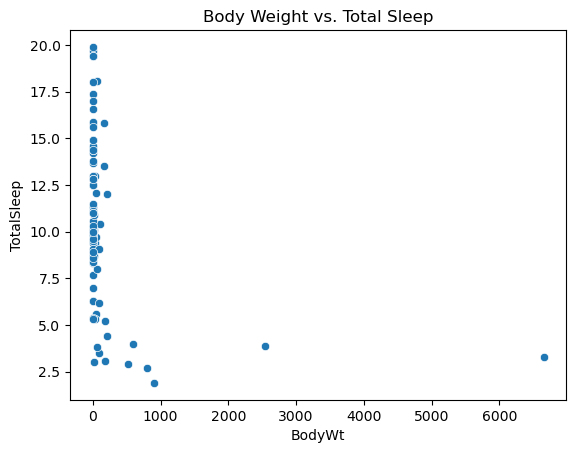

In [40]:
sns.scatterplot(x='BodyWt', y='TotalSleep', data=df)
plt.title('Body Weight vs. Total Sleep')
plt.show()

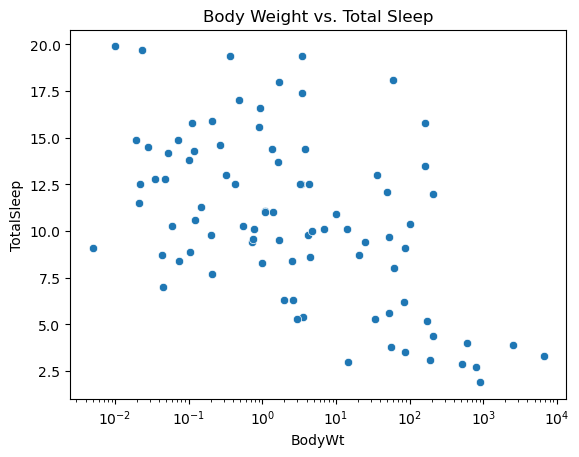

In [41]:
sns.scatterplot(x='BodyWt', y='TotalSleep', data=df)
plt.title('Body Weight vs. Total Sleep')
plt.xscale('log')
plt.show()

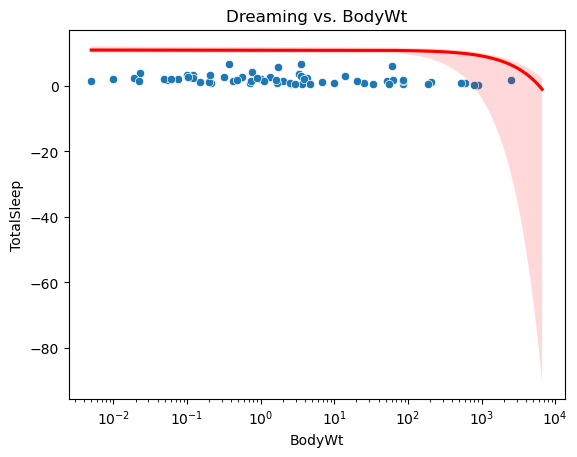

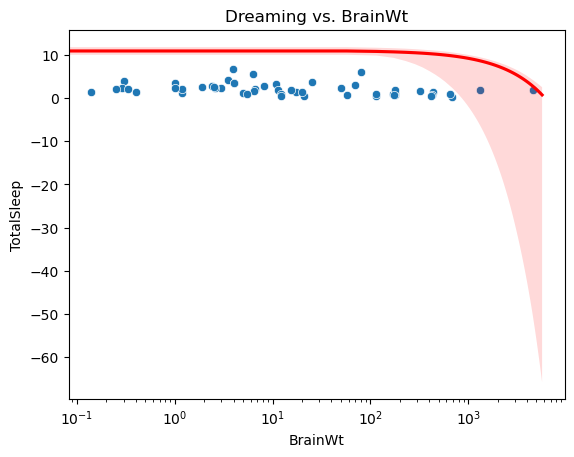

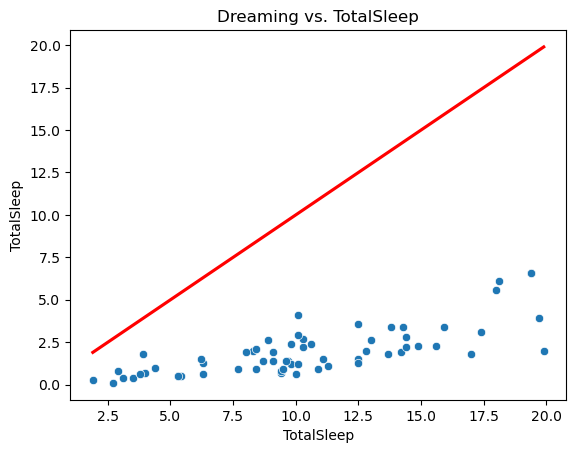

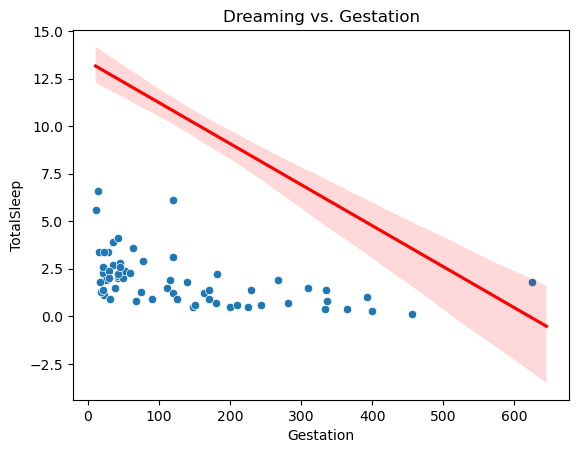

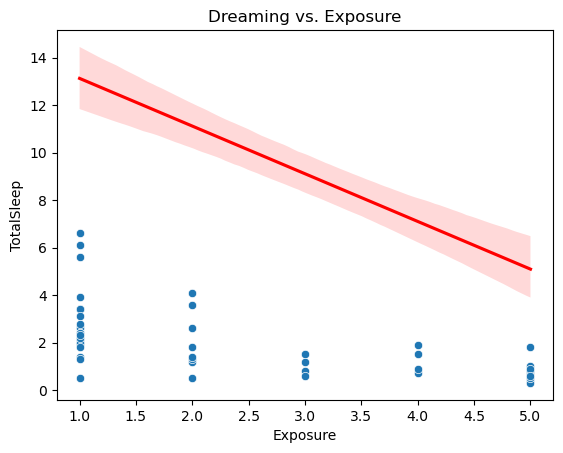

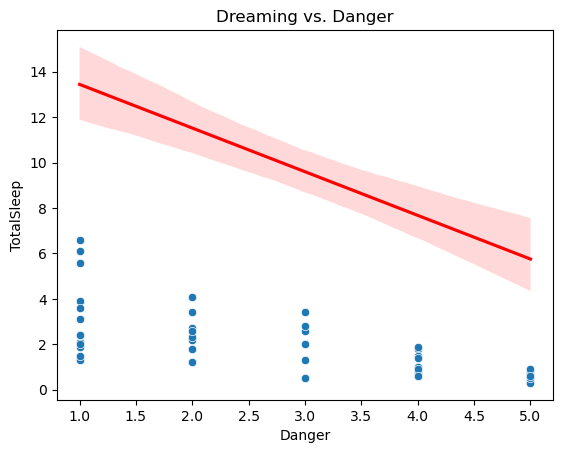

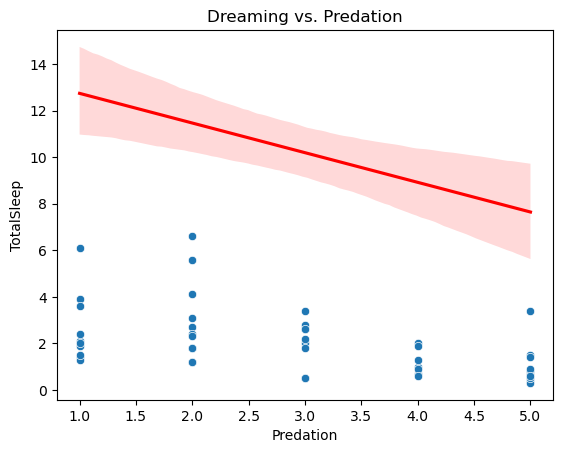

ValueError: Could not interpret value `Lifespan` for parameter `x`

In [43]:
variables = ['BodyWt', 'BrainWt', 'TotalSleep', 'Gestation', 'Exposure', 'Danger', 'Predation', 'Lifespan']
for var in variables:
    sns.scatterplot(x=var, y='Dreaming', data=df)
    sns.regplot(x=var, y='TotalSleep', data=df, scatter=False, color='red')
    plt.xscale('log') if var in ['BodyWt', 'BrainWt'] else plt.xscale('linear')  # Log scale for weight variables
    plt.title(f'Dreaming vs. {var}')
    plt.show()

## FE

In [44]:
from sklearn.linear_model import LinearRegression


# Splitting the dataset into rows with missing and non-missing 'Dreaming' values
df_missing_dreaming = df[df['Dreaming'].isna()]
df_non_missing_dreaming = df[~df['Dreaming'].isna()]

if not df_missing_dreaming.empty:

    # Defining the independent variables (X) and the dependent variable (y)
    X = df_non_missing_dreaming[['TotalSleep', 'Gestation']]
    y = df_non_missing_dreaming['Dreaming']

    # Training the regression model
    reg_model = LinearRegression()
    reg_model.fit(X, y)

    # Predicting the missing 'Dreaming' values using the model
    X_missing = df_missing_dreaming[['TotalSleep', 'Gestation']]
    predicted_dreaming_values = reg_model.predict(X_missing)

    # Imputing the missing 'Dreaming' values in the original DataFrame
    df.loc[df['Dreaming'].isna(), 'Dreaming'] = predicted_dreaming_values
else:
    # If there are no missing 'Dreaming' values, output a message or handle accordingly
    print("No missing 'Dreaming' values to impute.")


In [45]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming         0
LifeSpan         0
Gestation        0
Predation       29
Exposure        29
Danger          29
dtype: int64

In [111]:
# The code Displays : No missing 'Danger' values to impute.
# Because it's already executed


# For predicting missing values in 'Danger', I used RandomForestClassifier 
#because it' suitable for predicting categorical variables
#Instead of predicting continuous values, the classification model predicts 
#the category of 'Danger' for missing values.

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


# Splitting the dataset into rows with missing and non-missing 'Danger' values
df_missing_danger = df[df['Danger'].isna()]
df_non_missing_danger = df[~df['Danger'].isna()]

if not df_missing_danger.empty:
    
    # Defining the independent variables (X) and the dependent variable (y)
    X = df_non_missing_danger[['TotalSleep', 'Gestation']]
    y = df_non_missing_danger['Danger']

    # Training the classification model
    clf = RandomForestClassifier()
    clf.fit(X, y)

    # Predicting the missing 'Danger' values using the model
    X_missing = df_missing_danger[['TotalSleep', 'Gestation']]
    predicted_danger_values = clf.predict(X_missing)

    # Imputing the missing 'Danger' values in the original DataFrame
    df.loc[df['Danger'].isna(), 'Danger'] = predicted_danger_values
else:
    # If there are no missing 'Danger' values, output a message or handle accordingly
    print("No missing 'Danger' values to impute.")


No missing 'Danger' values to impute.


In [47]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming         0
LifeSpan         0
Gestation        0
Predation       29
Exposure        29
Danger           0
dtype: int64

In [48]:
# Same method of imputation for Exposure (reason= Exposure is a categorical variables )

from sklearn.ensemble import RandomForestClassifier


# Splitting the dataset into rows with missing and non-missing 'Exposure' values
df_missing_exposure = df[df['Exposure'].isna()]
df_non_missing_exposure = df[~df['Exposure'].isna()]

if not df_missing_exposure.empty:
    # If there are missing 'Exposure' values, proceed with prediction and imputation

    # Defining the independent variables (X) and the dependent variable (y)
    X = df_non_missing_exposure[['TotalSleep', 'Gestation', 'BodyWt']]  # You may include other relevant features
    y = df_non_missing_exposure['Exposure']

    # Training the classification model
    clf = RandomForestClassifier()
    clf.fit(X, y)

    # Predicting the missing 'Exposure' values using the model
    X_missing = df_missing_exposure[['TotalSleep', 'Gestation', 'BodyWt']]  # You may include other relevant features
    predicted_exposure_values = clf.predict(X_missing)

    # Imputing the missing 'Exposure' values in the original DataFrame
    df.loc[df['Exposure'].isna(), 'Exposure'] = predicted_exposure_values
else:
    # If there are no missing 'Exposure' values, output a message or handle accordingly
    print("No missing 'Exposure' values to impute.")


In [49]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming         0
LifeSpan         0
Gestation        0
Predation       29
Exposure         0
Danger           0
dtype: int64

In [50]:
# Correlation between 'Danger' and 'Predation'
df['Danger'].corr(df['Predation'])

0.9307822952154814

In [51]:
df = df.drop(columns="Predation")

In [52]:
df = df.drop(columns="Awake")

In [54]:
df

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,Elephantidae,herbi,vu,6654.000,5712.0,3.3,0.438792,38.6,645.0,5.0,3.0
1,African giant pouched rat,Cricetomys,Rodentia,Nesomyidae,omni,lc,1.000,6.6,8.3,2.000000,4.5,42.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,Muridae,omni,lc,0.044,0.0,8.7,1.516017,2.0,23.0,2.0,2.0
3,Arctic fox,Vulpes,Carnivora,Canidae,carni,lc,3.380,44.5,12.5,2.455213,14.0,60.0,1.0,1.0
4,Arctic ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.920,5.7,16.6,3.439966,11.0,25.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Vervet,Cercopithecus,Primates,Cercopithecidae,omni,lc,4.750,58.0,10.0,0.600000,24.0,210.0,3.0,4.0
83,Vesper mouse,Calomys,Rodentia,Cricetidae,herbi,lc,0.045,0.0,7.0,1.102166,2.0,23.0,1.0,3.0
84,Vole,Microtus,Rodentia,Cricetidae,herbi,lc,0.035,0.0,12.8,2.513363,2.0,21.0,1.0,3.0
85,Water opossum,Chironectes,Didelphimorphia,Didelphidae,carni,lc,3.500,3.9,19.4,6.600000,3.0,14.0,1.0,1.0


In [55]:
df_processsed = df.copy() 
# copy of the original DataFrame to preserve the original data ( a little too late)

In [56]:
# Label encoding 'Vore'



from sklearn.preprocessing import LabelEncoder

df_processed = df.copy()

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the label encoder and transform the 'Vore' column to numerical labels, updating 'df_processed'
df_processed['Vore'] = label_encoder.fit_transform(df_processed['Vore'])



In [57]:
category_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print("Category to Number Mapping:", category_mapping)

Category to Number Mapping: {0: 'carni', 1: 'herbi', 2: 'insecti', 3: 'omni'}


In [58]:
df_processed.Vore.head()

0    1
1    3
2    3
3    0
4    1
Name: Vore, dtype: int64

In [59]:
print(df_processed.head(10))

                     Species         Genus           Order            Family  \
0           African elephant     Loxodonta     Proboscidea      Elephantidae   
1  African giant pouched rat    Cricetomys        Rodentia        Nesomyidae   
2      African striped mouse     Rhabdomys        Rodentia           Muridae   
3                 Arctic fox        Vulpes       Carnivora           Canidae   
4     Arctic ground squirrel  Spermophilus        Rodentia         Sciuridae   
5             Asian elephant       Elephas     Proboscidea      Elephantidae   
6                     Baboon         Papio        Primates   Cercopithecidae   
7              Big brown bat     Eptesicus      Chiroptera  Vespertilionidae   
8       Bottle-nosed dolphin      Tursiops         Cetacea       Delphinidae   
9            Brazilian tapir       Tapirus  Perissodactyla         Tapiridae   

   Vore Conservation    BodyWt  BrainWt  TotalSleep  Dreaming  LifeSpan  \
0     1           vu  6654.000   5712.0     

In [61]:
# Label encoding 'Family'
# 46 Fam
df_processed.Family.value_counts()

Cricetidae          7
Sciuridae           5
Felidae             5
Muridae             4
Canidae             4
Cercopithecidae     4
Bovidae             3
Didelphidae         3
Soricidae           3
Procaviidae         3
Hominidae           3
Lorisidae           2
Talpidae            2
Equidae             2
Erinaceidae         2
Elephantidae        2
Phocidae            2
Delphinidae         2
Vespertilionidae    2
Tachyglossidae      1
Cebidae             1
Tenrecidae          1
Cervidae            1
Procyonidae         1
Leporidae           1
Bradypodidae        1
Potoroidae          1
Suidae              1
Phalangeridae       1
Aotidae             1
Otariidae           1
Giraffidae          1
Aplodontia          1
Lemuridae           1
Spalacidae          1
Dasypodidae         1
Caviidae            1
Nesomyidae          1
Chlamyphoridae      1
Viverridae          1
Galagidae           1
Octodontidae        1
Phocoena            1
Chinchillidae       1
Tapiridae           1
Tupaiidae 

In [62]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Family' column
df_processed['Family_encoded'] = label_encoder.fit_transform(df_processed['Family'])


In [63]:
# Display the mapping of family types to encoded integers
family_types = df_processed[['Family', 'Family_encoded']].drop_duplicates().sort_values('Family_encoded').reset_index(drop=True)
print(family_types)

              Family  Family_encoded
0            Aotidae               0
1         Aplodontia               1
2            Bovidae               2
3       Bradypodidae               3
4            Canidae               4
5           Caviidae               5
6            Cebidae               6
7    Cercopithecidae               7
8           Cervidae               8
9      Chinchillidae               9
10    Chlamyphoridae              10
11        Cricetidae              11
12       Dasypodidae              12
13       Delphinidae              13
14       Didelphidae              14
15      Elephantidae              15
16           Equidae              16
17       Erinaceidae              17
18           Felidae              18
19         Galagidae              19
20        Giraffidae              20
21         Hominidae              21
22         Lemuridae              22
23         Leporidae              23
24         Lorisidae              24
25           Muridae              25
2

In [64]:
print(df_processed.head())


                     Species         Genus        Order        Family  Vore  \
0           African elephant     Loxodonta  Proboscidea  Elephantidae     1   
1  African giant pouched rat    Cricetomys     Rodentia    Nesomyidae     3   
2      African striped mouse     Rhabdomys     Rodentia       Muridae     3   
3                 Arctic fox        Vulpes    Carnivora       Canidae     0   
4     Arctic ground squirrel  Spermophilus     Rodentia     Sciuridae     1   

  Conservation    BodyWt  BrainWt  TotalSleep  Dreaming  LifeSpan  Gestation  \
0           vu  6654.000   5712.0         3.3  0.438792      38.6      645.0   
1           lc     1.000      6.6         8.3  2.000000       4.5       42.0   
2           lc     0.044      0.0         8.7  1.516017       2.0       23.0   
3           lc     3.380     44.5        12.5  2.455213      14.0       60.0   
4           lc     0.920      5.7        16.6  3.439966      11.0       25.0   

   Exposure  Danger  Family_encoded  
0     

In [65]:
df_processed.drop('Family', axis=1)

In [66]:
# Label Encoding Genus



# Convert 'Genus' column to categorical type if it's not already
df_processed['Genus'] = df_processed['Genus'].astype('category')

# Use pandas factorize() to encode the 'Genus' column
df_processed['Genus_encoded'] = pd.factorize(df_processed['Genus'])[0]

# Optionally, replace the original 'Genus' column with the encoded values
df_processed['Genus'] = df_processed['Genus_encoded']

In [67]:
print(df_processed[['Genus', 'Genus_encoded']].head())


   Genus  Genus_encoded
0      0              0
1      1              1
2      2              2
3      3              3
4      4              4


In [68]:
df_processed.head(10)

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Exposure,Danger,Family_encoded,Genus_encoded
0,African elephant,0,Proboscidea,1,vu,6654.000,5712.0,3.3,0.438792,38.6,645.0,5.0,3.0,15,0
1,African giant pouched rat,1,Rodentia,3,lc,1.000,6.6,8.3,2.000000,4.5,42.0,1.0,3.0,26,1
2,African striped mouse,2,Rodentia,3,lc,0.044,0.0,8.7,1.516017,2.0,23.0,2.0,2.0,25,2
3,Arctic fox,3,Carnivora,0,lc,3.380,44.5,12.5,2.455213,14.0,60.0,1.0,1.0,4,3
4,Arctic ground squirrel,4,Rodentia,1,lc,0.920,5.7,16.6,3.439966,11.0,25.0,2.0,3.0,35,4
5,Asian elephant,5,Proboscidea,1,en,2547.000,4603.0,3.9,1.800000,69.0,624.0,5.0,4.0,15,5
6,Baboon,6,Primates,3,lc,25.235,180.0,9.4,0.700000,27.0,180.0,4.0,4.0,7,6
7,Big brown bat,7,Chiroptera,2,lc,0.023,0.3,19.7,3.900000,19.0,35.0,1.0,1.0,44,7
8,Bottle-nosed dolphin,8,Cetacea,0,lc,173.330,0.0,5.2,0.794481,50.0,365.0,5.0,4.0,13,8
9,Brazilian tapir,9,Perissodactyla,1,vu,207.501,169.0,4.4,1.000000,30.4,392.0,5.0,4.0,41,9


In [ ]:
# ALREADY EXECUTED
# df_processed.drop('Genus_encoded', axis=1, inplace=True)



In [70]:
df_processed.shape[1]


14

In [72]:
df_processed.columns

Index(['Species', 'Genus', 'Order', 'Vore', 'Conservation', 'BodyWt',
       'BrainWt', 'TotalSleep', 'Dreaming', 'LifeSpan', 'Gestation',
       'Exposure', 'Danger', 'Family_encoded'],
      dtype='object')

In [74]:
df_processed.Conservation.value_counts()

lc              50
domesticated    10
vu               9
en               8
nt               7
cd               2
cr               1
Name: Conservation, dtype: int64

In [75]:
#'cd' category, once indicating species needing conservation to avoid higher risk,
# is no longer used by the IUCN. Its ambiguous status, suggesting risk but less than Vulnerable, 
#allows for flexible placement in encoding, possibly near Near Threatened or as 3

conservation_mapping = {
    'Domesticated': 1,
    'lc': 2,
    'nt': 3,
    'cd': 3,  # or another value, depending on how you decide to treat it
    'vu': 4,
    'en': 5,
    'cr': 6
}

df_processed['Conservation_encoded'] = df_processed['Conservation'].map(conservation_mapping)



df_processed[['Conservation', 'Conservation_encoded']].head()


,Conservation,Conservation_encoded
0,vu,4.0
1,lc,2.0
2,lc,2.0
3,lc,2.0
4,lc,2.0


In [77]:
df_processed.Conservation.isna().sum()

0

In [78]:
df_processed

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Exposure,Danger,Family_encoded,Conservation_encoded
0,African elephant,0,Proboscidea,1,vu,6654.000,5712.0,3.3,0.438792,38.6,645.0,5.0,3.0,15,4.0
1,African giant pouched rat,1,Rodentia,3,lc,1.000,6.6,8.3,2.000000,4.5,42.0,1.0,3.0,26,2.0
2,African striped mouse,2,Rodentia,3,lc,0.044,0.0,8.7,1.516017,2.0,23.0,2.0,2.0,25,2.0
3,Arctic fox,3,Carnivora,0,lc,3.380,44.5,12.5,2.455213,14.0,60.0,1.0,1.0,4,2.0
4,Arctic ground squirrel,4,Rodentia,1,lc,0.920,5.7,16.6,3.439966,11.0,25.0,2.0,3.0,35,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Vervet,75,Primates,3,lc,4.750,58.0,10.0,0.600000,24.0,210.0,3.0,4.0,7,2.0
83,Vesper mouse,76,Rodentia,1,lc,0.045,0.0,7.0,1.102166,2.0,23.0,1.0,3.0,11,2.0
84,Vole,77,Rodentia,1,lc,0.035,0.0,12.8,2.513363,2.0,21.0,1.0,3.0,11,2.0
85,Water opossum,78,Didelphimorphia,0,lc,3.500,3.9,19.4,6.600000,3.0,14.0,1.0,1.0,14,2.0


In [79]:
# Label Encode of 'Order' , Convert it to categorical type 

df_processed['Order'] = df_processed['Order'].astype('category')

# Use pandas factorize() to encode the 'Order' column
df_processed['Order_encoded'] = pd.factorize(df_processed['Order'])[0]

# Replace the original 'Order' column with the encoded values
df_processed['Order'] = df_processed['Order_encoded']



In [83]:
df_processed[['Order', 'Order_encoded']].head(10)

,Order,Order_encoded
0,0,0
1,1,1
2,1,1
3,2,2
4,1,1
5,0,0
6,3,3
7,4,4
8,5,5
9,6,6


In [82]:
df_processed.columns

Index(['Species', 'Genus', 'Order', 'Vore', 'Conservation', 'BodyWt',
       'BrainWt', 'TotalSleep', 'Dreaming', 'LifeSpan', 'Gestation',
       'Exposure', 'Danger', 'Family_encoded', 'Conservation_encoded',
       'Order_encoded'],
      dtype='object')

In [85]:
df_processed

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Exposure,Danger,Family_encoded,Conservation_encoded,Order_encoded
0,African elephant,0,0,1,vu,6654.000,5712.0,3.3,0.438792,38.6,645.0,5.0,3.0,15,4.0,0
1,African giant pouched rat,1,1,3,lc,1.000,6.6,8.3,2.000000,4.5,42.0,1.0,3.0,26,2.0,1
2,African striped mouse,2,1,3,lc,0.044,0.0,8.7,1.516017,2.0,23.0,2.0,2.0,25,2.0,1
3,Arctic fox,3,2,0,lc,3.380,44.5,12.5,2.455213,14.0,60.0,1.0,1.0,4,2.0,2
4,Arctic ground squirrel,4,1,1,lc,0.920,5.7,16.6,3.439966,11.0,25.0,2.0,3.0,35,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Vervet,75,3,3,lc,4.750,58.0,10.0,0.600000,24.0,210.0,3.0,4.0,7,2.0,3
83,Vesper mouse,76,1,1,lc,0.045,0.0,7.0,1.102166,2.0,23.0,1.0,3.0,11,2.0,1
84,Vole,77,1,1,lc,0.035,0.0,12.8,2.513363,2.0,21.0,1.0,3.0,11,2.0,1
85,Water opossum,78,12,0,lc,3.500,3.9,19.4,6.600000,3.0,14.0,1.0,1.0,14,2.0,12


In [88]:
df_processed.drop('Order_encoded', axis=1)

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Exposure,Danger,Family_encoded,Conservation_encoded
0,African elephant,0,0,1,vu,6654.000,5712.0,3.3,0.438792,38.6,645.0,5.0,3.0,15,4.0
1,African giant pouched rat,1,1,3,lc,1.000,6.6,8.3,2.000000,4.5,42.0,1.0,3.0,26,2.0
2,African striped mouse,2,1,3,lc,0.044,0.0,8.7,1.516017,2.0,23.0,2.0,2.0,25,2.0
3,Arctic fox,3,2,0,lc,3.380,44.5,12.5,2.455213,14.0,60.0,1.0,1.0,4,2.0
4,Arctic ground squirrel,4,1,1,lc,0.920,5.7,16.6,3.439966,11.0,25.0,2.0,3.0,35,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Vervet,75,3,3,lc,4.750,58.0,10.0,0.600000,24.0,210.0,3.0,4.0,7,2.0
83,Vesper mouse,76,1,1,lc,0.045,0.0,7.0,1.102166,2.0,23.0,1.0,3.0,11,2.0
84,Vole,77,1,1,lc,0.035,0.0,12.8,2.513363,2.0,21.0,1.0,3.0,11,2.0
85,Water opossum,78,12,0,lc,3.500,3.9,19.4,6.600000,3.0,14.0,1.0,1.0,14,2.0


In [90]:
df_processed.columns

Index(['Species', 'Genus', 'Order', 'Vore', 'Conservation', 'BodyWt',
       'BrainWt', 'TotalSleep', 'Dreaming', 'LifeSpan', 'Gestation',
       'Exposure', 'Danger', 'Family_encoded', 'Conservation_encoded',
       'Order_encoded'],
      dtype='object')

In [ ]:
df_processed.drop('Conservation', axis=1)

In [103]:
df_processed.head(47)

,Species,Genus,Order,Vore,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Exposure,Danger,Family_encoded,Conservation_encoded,Order_encoded
0,African elephant,0,0,1,6654.000,5712.00,3.3,0.438792,38.6,645.0,5.0,3.0,15,4.0,0
1,African giant pouched rat,1,1,3,1.000,6.60,8.3,2.000000,4.5,42.0,1.0,3.0,26,2.0,1
2,African striped mouse,2,1,3,0.044,0.00,8.7,1.516017,2.0,23.0,2.0,2.0,25,2.0,1
3,Arctic fox,3,2,0,3.380,44.50,12.5,2.455213,14.0,60.0,1.0,1.0,4,2.0,2
4,Arctic ground squirrel,4,1,1,0.920,5.70,16.6,3.439966,11.0,25.0,2.0,3.0,35,2.0,1
5,Asian elephant,5,0,1,2547.000,4603.00,3.9,1.800000,69.0,624.0,5.0,4.0,15,5.0,0
6,Baboon,6,3,3,25.235,180.00,9.4,0.700000,27.0,180.0,4.0,4.0,7,2.0,3
7,Big brown bat,7,4,2,0.023,0.30,19.7,3.900000,19.0,35.0,1.0,1.0,44,2.0,4
8,Bottle-nosed dolphin,8,5,0,173.330,0.00,5.2,0.794481,50.0,365.0,5.0,4.0,13,2.0,5
9,Brazilian tapir,9,6,1,207.501,169.00,4.4,1.000000,30.4,392.0,5.0,4.0,41,4.0,6


In [100]:
df_processed = df_processed.drop(columns="Conservation")

In [102]:
df_processed.columns

Index(['Species', 'Genus', 'Order', 'Vore', 'BodyWt', 'BrainWt', 'TotalSleep',
       'Dreaming', 'LifeSpan', 'Gestation', 'Exposure', 'Danger',
       'Family_encoded', 'Conservation_encoded', 'Order_encoded'],
      dtype='object')

In [104]:
df_processed['Species_index'] = pd.factorize(df['Species'])[0]

In [106]:
df_processed.head(5)

,Species,Genus,Order,Vore,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Exposure,Danger,Family_encoded,Conservation_encoded,Order_encoded,Species_index
0,African elephant,0,0,1,6654.000,5712.0,3.3,0.438792,38.6,645.0,5.0,3.0,15,4.0,0,0
1,African giant pouched rat,1,1,3,1.000,6.6,8.3,2.000000,4.5,42.0,1.0,3.0,26,2.0,1,1
2,African striped mouse,2,1,3,0.044,0.0,8.7,1.516017,2.0,23.0,2.0,2.0,25,2.0,1,2
3,Arctic fox,3,2,0,3.380,44.5,12.5,2.455213,14.0,60.0,1.0,1.0,4,2.0,2,3
4,Arctic ground squirrel,4,1,1,0.920,5.7,16.6,3.439966,11.0,25.0,2.0,3.0,35,2.0,1,4


In [110]:
df_processed.drop('Species', axis=1)

,Genus,Order,Vore,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Exposure,Danger,Family_encoded,Conservation_encoded,Order_encoded,Species_index
0,0,0,1,6654.000,5712.0,3.3,0.438792,38.6,645.0,5.0,3.0,15,4.0,0,0
1,1,1,3,1.000,6.6,8.3,2.000000,4.5,42.0,1.0,3.0,26,2.0,1,1
2,2,1,3,0.044,0.0,8.7,1.516017,2.0,23.0,2.0,2.0,25,2.0,1,2
3,3,2,0,3.380,44.5,12.5,2.455213,14.0,60.0,1.0,1.0,4,2.0,2,3
4,4,1,1,0.920,5.7,16.6,3.439966,11.0,25.0,2.0,3.0,35,2.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,75,3,3,4.750,58.0,10.0,0.600000,24.0,210.0,3.0,4.0,7,2.0,3,82
83,76,1,1,0.045,0.0,7.0,1.102166,2.0,23.0,1.0,3.0,11,2.0,1,83
84,77,1,1,0.035,0.0,12.8,2.513363,2.0,21.0,1.0,3.0,11,2.0,1,84
85,78,12,0,3.500,3.9,19.4,6.600000,3.0,14.0,1.0,1.0,14,2.0,12,85
